In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Carregar o dataset do UCI ou localmente se baixado.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Carregando os dados
df = pd.read_csv(url, header=None, names=columns)

# Removendo a coluna de ID pois ela não traz informações relevantes para o agrupamento
df.drop(['ID'], axis=1, inplace=True)

# Convertendo a coluna de diagnóstico em uma variável binária
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Separando os dados e a variável alvo
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

# Normalização dos dados para o K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Avaliar diferentes números de clusters para encontrar o melhor K usando a métrica de Silhueta
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append((k, score))

# Escolher o melhor K com base na métrica de Silhueta
best_k = max(scores, key=lambda item: item[1])[0]
print(f"Melhor número de clusters (K) baseado na Silhueta: {best_k}")

# Aplicando o KMeans com o melhor número de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


Melhor número de clusters (K) baseado na Silhueta: 2


In [8]:
# Adicionando a informação dos clusters ao DataFrame
df['Cluster'] = y_kmeans

# Agrupando por clusters para ver as médias das características
cluster_analysis = df.groupby('Cluster').mean()
print("Médias das características celulares por cluster:")
print(cluster_analysis)

# Analisando a correspondência entre clusters e o diagnóstico benigno/maligno
correspondence = pd.crosstab(df['Cluster'], df['Diagnosis'])
print("\nCorrespondência entre clusters e diagnóstico (0 = Benigno, 1 = Maligno):")
print(correspondence)


Médias das características celulares por cluster:
         Diagnosis  feature_1  feature_2   feature_3   feature_4  feature_5  \
Cluster                                                                       
0         0.930851  17.600702  21.403989  116.699840  997.632447   0.104610   
1         0.097113  12.413378  18.246352   79.765906  485.766404   0.092289   

         feature_6  feature_7  feature_8  feature_9  ...  feature_21  \
Cluster                                              ...               
0         0.157850   0.179992   0.094290   0.197689  ...   21.350319   
1         0.077938   0.043801   0.026532   0.173007  ...   13.761966   

         feature_22  feature_23   feature_24  feature_25  feature_26  \
Cluster                                                                
0         28.852394   143.44266  1457.356383    0.146011    0.404052   
1         24.110472    89.40790   595.981102    0.125637    0.180354   

         feature_27  feature_28  feature_29  feature_30

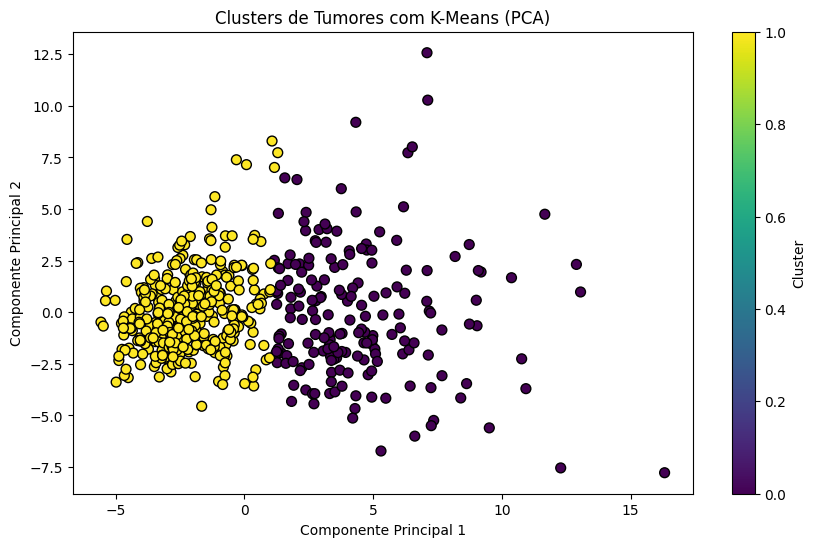

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizando os clusters em 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Clusters de Tumores com K-Means (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


In [15]:
# Verificando a correspondência entre clusters e diagnósticos
correspondence = pd.crosstab(df['Cluster'], df['Diagnosis'])
print("\nCorrespondência entre clusters e diagnóstico (0 = Benigno, 1 = Maligno):")
print(correspondence)




Correspondência entre clusters e diagnóstico (0 = Benigno, 1 = Maligno):
Diagnosis    0    1
Cluster            
0           13  175
1          344   37


In [17]:
# Características médias por cluster
cluster_means = df.groupby('Cluster').mean()
print("\nCaracterísticas médias de cada cluster:")
print(cluster_means)



Características médias de cada cluster:
         Diagnosis  feature_1  feature_2   feature_3   feature_4  feature_5  \
Cluster                                                                       
0         0.930851  17.600702  21.403989  116.699840  997.632447   0.104610   
1         0.097113  12.413378  18.246352   79.765906  485.766404   0.092289   

         feature_6  feature_7  feature_8  feature_9  ...  feature_21  \
Cluster                                              ...               
0         0.157850   0.179992   0.094290   0.197689  ...   21.350319   
1         0.077938   0.043801   0.026532   0.173007  ...   13.761966   

         feature_22  feature_23   feature_24  feature_25  feature_26  \
Cluster                                                                
0         28.852394   143.44266  1457.356383    0.146011    0.404052   
1         24.110472    89.40790   595.981102    0.125637    0.180354   

         feature_27  feature_28  feature_29  feature_30  
Cluste

In [19]:
# Taxa de pureza dos clusters
for cluster in correspondence.index:
    predominant_class_count = correspondence.loc[cluster].max()
    total_count = correspondence.loc[cluster].sum()
    purity = predominant_class_count / total_count
    print(f"Cluster {cluster} - Pureza: {purity:.2f}")


Cluster 0 - Pureza: 0.93
Cluster 1 - Pureza: 0.90
